# Grouping similar images

This script takes a folder of images and groups them into similar clusters. 

In [39]:
import os
import glob
import csv
import pandas as pd

from sklearn.cluster import KMeans
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np


In [50]:
model = VGG16(weights='imagenet', include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [41]:
path = os.path.normpath(r'C:\path\to\images')


In [ ]:
vgg16_feature_list = []

filenames = []

for file in glob.glob(path +'\\*.png'):
    filenames.append(os.path.basename(file))
    img = image.load_img(file, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Sum_of_squared_distances = []
K = range(10,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vgg16_feature_list)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

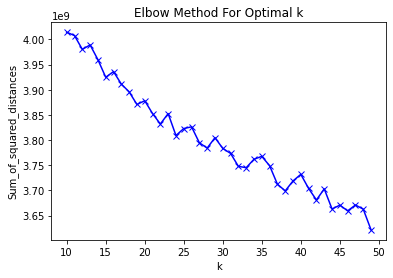

In [51]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
import shutil


In [ ]:
photo_clusters = {}

kmeans = KMeans(n_clusters=50, random_state=0).fit(vgg16_feature_list_np)

for new_folder_name in np.unique(kmeans.labels_):
    os.mkdir(path + '\\' + str(new_folder_name))


for index, value in enumerate(filenames):
    shutil.move(path + '\\' + value, path +'\\' + str(kmeans.labels_[index]) + '\\' + value)